In [1]:
import numpy as np     # scientific calculation
import pandas as pd    # handle csv file
import seaborn as sns  # visualize 
import matplotlib.pyplot as plt # plotting

In [2]:
df =pd.read_csv('RFM_clear.csv')

In [3]:
df=df.rename(columns={'R_Quartile':'R','F_Quartile':'F','M_Quartile':'M'})

In [4]:
df['RFM_Score'] = df.R.astype(str)+ df.F.astype(str) + df.M.astype(str)
df.drop(df.tail(1).index,inplace=True)
df

,Unnamed: 0,CustomerID,InvoiceDate,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,...,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY,All,recency,frequency,monetary,R,F,M,RFM_Score
0,3032,16446,2011/12/9,0,0,0,0,0,0,0,...,0,0,2,0,2,2.90,5,2,1,521
1,3242,16738,2011/2/15,0,0,0,0,0,0,0,...,0,0,1,297,1,3.75,1,1,1,111
2,4129,17956,2011/4/4,0,0,0,0,0,0,0,...,0,0,1,249,1,12.75,1,1,1,111
3,729,13307,2011/8/11,0,0,0,0,0,0,0,...,0,0,1,120,1,15.00,2,1,1,211
4,3990,17763,2011/3/21,0,0,0,0,0,0,0,...,0,0,1,263,1,15.00,1,1,1,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4310,1344,14156,2011/11/30,1,0,0,0,0,0,0,...,0,0,31,9,51,113384.14,5,5,5,555
4311,54,12415,2011/11/15,0,0,0,0,0,0,0,...,0,0,27,24,18,123725.45,4,5,5,455
4312,1894,14911,2011/12/8,0,0,0,0,0,0,0,...,0,0,72,1,146,132572.62,5,5,5,555
4313,3757,17450,2011/12/1,0,0,0,0,0,0,0,...,0,0,5,8,33,187482.17,5,5,5,555


In [5]:
df1 = df.loc[:,'R':'M']

In [6]:
df1

,R,F,M
0,5,2,1
1,1,1,1
2,1,1,1
3,2,1,1
4,1,1,1
...,...,...,...
4310,5,5,5
4311,4,5,5
4312,5,5,5
4313,5,5,5


In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # matplotlib 3.2.0 後可省略
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [8]:
wcss = []
# 計算 k=1~27 的損失函數
for i in range(1,27):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(df1)
    # kmeans.inertia_
    wcss.append(kmeans.inertia_)

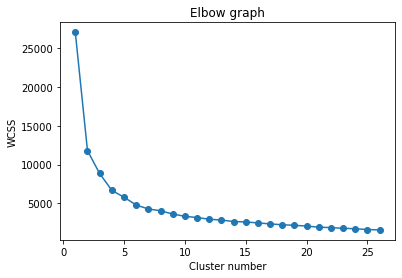

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt 

plt.plot(range(1,27), wcss, marker='o')
plt.title('Elbow graph')
plt.xlabel('Cluster number')
plt.ylabel('WCSS')
plt.show()

In [10]:
wcss[25]

1591.8468744688623

In [11]:
# 10 clusters

kmeans = KMeans(n_clusters=27, init='k-means++', random_state=0)
df1['clusters'] = kmeans.fit_predict(df1)
print(round(pd.DataFrame(kmeans.cluster_centers_),2))

       0     1     2
0   2.00  1.40  2.00
1   5.00  3.82  4.33
2   3.16  3.87  5.00
3   3.00  2.52  3.22
4   4.32  1.24  1.00
5   5.00  5.00  5.00
6   4.26  2.32  3.44
7   1.00  1.63  2.71
8   1.00  1.12  1.00
9   1.76  2.36  4.29
10  4.40  2.17  1.94
11  1.70  3.34  1.72
12  1.00  1.00  2.00
13  5.00  3.53  2.72
14  1.77  4.11  3.63
15  2.46  1.00  3.30
16  4.00  4.29  4.00
17  4.00  5.00  5.00
18  2.00  1.20  1.00
19  1.89  2.45  3.00
20  3.00  1.35  2.00
21  4.28  1.00  2.27
22  3.00  4.30  4.00
23  2.70  5.00  5.00
24  5.00  5.00  3.96
25  3.00  1.16  1.00
26  3.54  4.04  2.90


In [12]:
df1['CustomerID'] = df['CustomerID']

In [13]:
df1['monetary'] = df['monetary']

In [14]:
df1.sort_values('clusters', inplace = True)

In [15]:
df1

,R,F,M,clusters,CustomerID,monetary
1202,2,1,2,0,17866,325.70
1612,2,2,2,0,12592,437.60
1090,2,1,2,0,13667,305.02
1089,2,1,2,0,17941,304.56
1615,2,2,2,0,14272,437.96
...,...,...,...,...,...,...
2356,3,4,3,26,18136,761.83
2452,3,4,3,26,17169,816.88
1746,4,4,3,26,13984,488.03
2564,4,4,3,26,14449,907.10


In [20]:
df1.sort_values('monetary', inplace = True)
df1.tail(100)

,R,F,M,clusters,CustomerID,monetary
4215,5,5,5,5,15078,9623.35
4216,5,5,5,5,13001,9797.92
4217,5,5,5,5,13199,9803.96
4218,1,2,5,9,12590,9861.38
4219,5,5,5,5,17706,10097.37
...,...,...,...,...,...,...
4310,5,5,5,5,14156,113384.14
4311,4,5,5,17,12415,123725.45
4312,5,5,5,5,14911,132572.62
4313,5,5,5,5,17450,187482.17


In [21]:
# No.1 loyal customers
# give them some benifit and they will buy more
df1[df1.clusters== 5]

,R,F,M,clusters,CustomerID,monetary
3443,5,5,5,5,14730,2005.06
3448,5,5,5,5,14188,2018.91
3449,5,5,5,5,18219,2019.77
3458,5,5,5,5,17090,2041.85
3467,5,5,5,5,13126,2056.29
...,...,...,...,...,...,...
4309,5,5,5,5,17511,88125.38
4310,5,5,5,5,14156,113384.14
4312,5,5,5,5,14911,132572.62
4313,5,5,5,5,17450,187482.17


In [22]:
# No.2 loyal customers
# give them some benifit and they will buy more
df1[df1.clusters== 17]

,R,F,M,clusters,CustomerID,monetary
3459,4,5,5,17,14640,2042.15
3461,4,5,5,17,14232,2043.93
3465,4,5,5,17,12948,2053.70
3469,4,5,5,17,12610,2057.99
3486,4,5,5,17,13571,2092.32
...,...,...,...,...,...,...
4275,4,5,5,17,12731,18793.41
4285,4,5,5,17,14680,26932.34
4294,4,5,5,17,12931,33462.81
4295,4,5,5,17,16422,33805.69


In [23]:
# they used to buying a lot, but they buy less lately
# maybe we can sand some notification message to them
df1[df1.clusters== 23]

,R,F,M,clusters,CustomerID,monetary
3444,2,5,5,23,16098,2005.63
3452,3,5,5,23,16875,2023.47
3483,3,5,5,23,14810,2087.88
3496,2,5,5,23,14407,2111.08
3498,3,5,5,23,18008,2116.19
...,...,...,...,...,...,...
4187,3,5,5,23,14952,7912.79
4221,3,5,5,23,16843,10183.82
4222,2,5,5,23,16180,10217.48
4272,3,5,5,23,12678,17588.26


In [25]:
# potential customers
# lately buy a lot
# do a survey about why they come frequently in recency 
df1[df1.clusters== 16]

,R,F,M,clusters,CustomerID,monetary
2576,4,4,4,16,13782,912.00
2577,4,4,4,16,16809,912.74
2582,4,4,4,16,15253,915.30
2583,4,5,4,16,13549,916.12
2584,4,4,4,16,17236,916.13
...,...,...,...,...,...,...
3409,4,4,4,16,13246,1922.10
3422,4,4,4,16,16341,1959.38
3424,4,5,4,16,17790,1965.55
3433,4,4,4,16,17088,1991.01


In [26]:
# potential customers
# lately buy a lot
# do a survey about why they come frequently in recency 
df1[df1.clusters== 24]

,R,F,M,clusters,CustomerID,monetary
2168,5,5,3,24,14198,663.50
2263,5,5,3,24,17526,706.70
2337,5,5,3,24,17114,747.22
2604,5,5,4,24,13026,936.15
2606,5,5,4,24,17097,937.92
...,...,...,...,...,...,...
3412,5,5,4,24,17490,1926.88
3423,5,5,4,24,17218,1960.72
3427,5,5,4,24,13590,1976.12
3437,5,5,4,24,13630,1995.68
